In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cv2.__version__

'3.4.7'

### Reading a Coloured Image

In [3]:
image = cv2.imread('wallpaper1.jpg')

In [4]:
cv2.imshow('image', image) 
cv2.waitKey(0) 
cv2.destroyAllWindows() #press any key to exit from the image window

# Reading the image using matplotlib

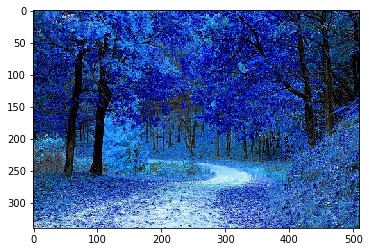

In [5]:
plt.imshow(image)
plt.show()

### Reading a GrayScaled Image

In [6]:
img = cv2.imread('wallpaper1.jpg', cv2.IMREAD_GRAYSCALE)

In [7]:
cv2.imshow('image', img) 
cv2.waitKey(0) 
cv2.destroyAllWindows() #press any key to exit from the image window

# Reading the image using matplotlib

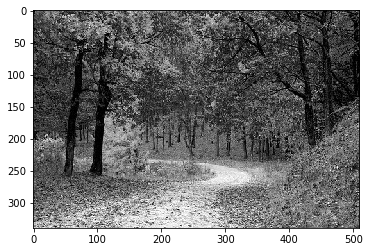

In [8]:
plt.imshow(img, cmap = 'gray')
plt.show()

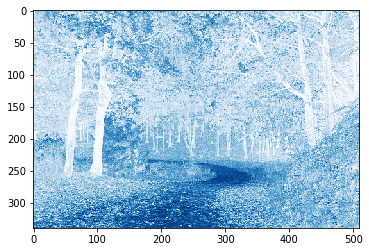

In [9]:
plt.imshow(img, cmap = 'Blues')
plt.show()

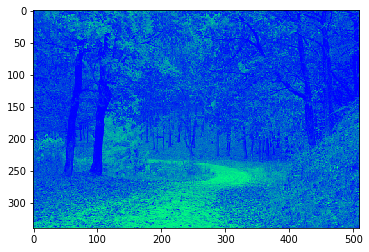

In [10]:
plt.imshow(img, cmap = 'winter')
plt.show()

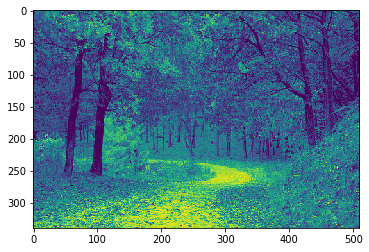

In [11]:
plt.imshow(img, cmap = 'viridis')
plt.show()

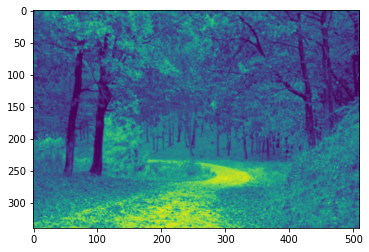

In [12]:
plt.imshow(img, interpolation = 'bicubic')
plt.show()

# Displaying  Video using Opencv

In [13]:
# Create a VideoCapture object and read from input file 
cap = cv2.VideoCapture('machine_learning.mp4')

In [14]:
# Check if camera opened successfully 
if (cap.isOpened()== False):  
  print("Error opening video  file") 

In [15]:
# Read until video is completed 
while(cap.isOpened()): 

    # Capture frame-by-frame 
    ret, frame = cap.read() 
    if ret == True: 
        # Display the resulting frame 
        cv2.imshow('Frame', frame) 

        # Press Q on keyboard to exit 
        if cv2.waitKey(25) & 0xFF == ord('q'): 
            break

    # Break the loop 
    else: 
        break

# When everything done, release 
# the video capture object 
cap.release() 

# Closes all the frames 
cv2.destroyAllWindows() 

# Reading images in different color

By default, the imread function reads images in the BGR (Blue-Green-Red) format. We can read images in different formats using extra flags in the imread function:

cv2.IMREAD_COLOR: Default flag for loading a color image

cv2.IMREAD_GRAYSCALE: Loads images in grayscale format

cv2.IMREAD_UNCHANGED: Loads images in their given format, including the alpha channel. Alpha channel stores the transparency information – the higher the value of alpha channel, the more opaque is the pixel

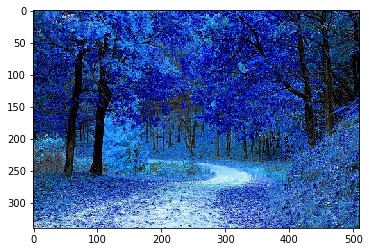

In [16]:
image = cv2.imread('wallpaper1.jpg', cv2.IMREAD_COLOR)

#plotting the image
plt.imshow(image)
plt.show()

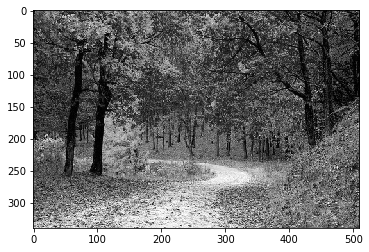

In [17]:
image = cv2.imread('wallpaper1.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

#plotting the image
plt.imshow(image, cmap = 'gray')
plt.show()

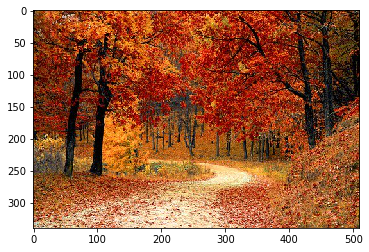

In [18]:
image = cv2.imread('wallpaper1.jpg', cv2.IMREAD_UNCHANGED)

image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

#plotting the image
plt.imshow(image)
plt.show()

# Changing Color Spaces

Applications like video compression and device independent storage are heavily dependent on other color spaces, like the Hue-Saturation-Value or HSV color space.

A RGB image consists of the color intensity of different color channels, i.e. the intensity and color information are mixed in RGB color space but in HSV color space the color and intensity information are separated from each other. This makes HSV color space more robust to lighting changes.

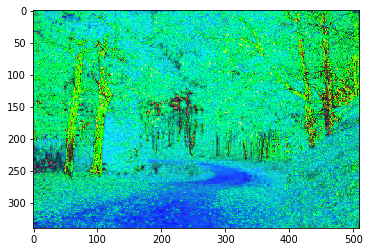

In [19]:
image = cv2.imread('wallpaper1.jpg', cv2.IMREAD_COLOR)

#converting image to HSV format
hsv_image = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)

#plotting the HSV image
plt.imshow(hsv_image)
plt.show()

# Resizing Images

Different interpolation :

INTER_NEAREST: Nearest neighbor interpolation

INTER_LINEAR: Bilinear interpolation

INTER_AREA: Resampling using pixel area relation

INTER_CUBIC: Bicubic interpolation over 4×4 pixel neighborhood

INTER_LANCZOS4: Lanczos interpolation over 8×8 neighborhood

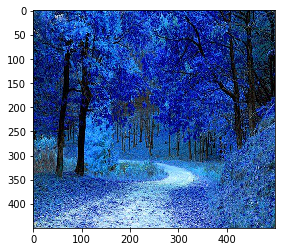

In [20]:
image = cv2.imread('wallpaper1.jpg') 
 
smaller_image = cv2.resize(image,(500,450), interpolation = cv2.INTER_CUBIC)

plt.imshow(smaller_image)
plt.show()

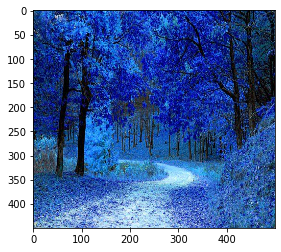

In [21]:
image = cv2.imread('wallpaper1.jpg') 
 
smaller_image = cv2.resize(image,(500,450), interpolation = cv2.INTER_LINEAR)

plt.imshow(smaller_image)
plt.show() 

# Image Rotation

Data augmentation- This method allows us to generate more samples for training our deep learning model. Data augmentation uses the available data samples to produce the new ones, by applying image operations like rotation, scaling, translation, etc. This makes our model robust to changes in input and leads to better generalization.

Rotation is one of the most used and easy to implement data augmentation techniques. As the name suggests, it involves rotating the image at an arbitrary angle and providing it the same label as the original image.

In [22]:
image = cv2.imread('wallpaper1.jpg') 

In [23]:
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

In [24]:
image.shape

(340, 510, 3)

In [25]:
rows, cols = image.shape[:2]

In [26]:
rows, cols

(340, 510)

In [27]:
#(col/2,rows/2) is the center of rotation for the image 
# M is the cordinates of the center 
M = cv2.getRotationMatrix2D(center = (cols/2,rows/2), angle = 180, scale = 1) 

In [28]:
M

array([[-1.0000000e+00,  1.2246468e-16,  5.1000000e+02],
       [-1.2246468e-16, -1.0000000e+00,  3.4000000e+02]])

In [29]:
dst = cv2.warpAffine(image,M,(cols,rows)) 

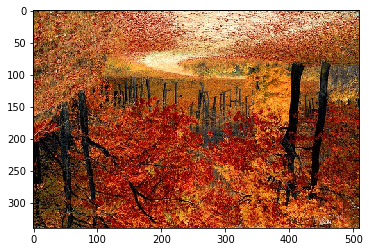

In [30]:
plt.imshow(dst)

# Image Translation

Image translation is a geometric transformation that maps the position of every object in the image to a new location in the final output image. After the translation operation, an object present at location (x,y) in the input image is shifted to a new position (X,Y):

X = x + dx

Y = y + dy

Here, dx and dy are the respective translations along different dimensions.

In [31]:
image = cv2.imread('wallpaper1.jpg') 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [32]:
#shifting the image 100 pixels in both dimensions
M = np.float32([[1,0,100],[0,1,100]]) 

In [33]:
M

array([[  1.,   0., 100.],
       [  0.,   1., 100.]], dtype=float32)

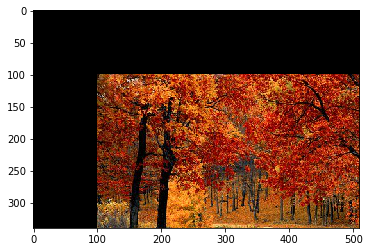

In [34]:
dst = cv2.warpAffine(image, M, (cols, rows)) 
plt.imshow(dst)

# Simple Image Thresholding

Thresholding is an image segmentation method. It compares pixel values with a threshold value and updates it accordingly. OpenCV supports multiple variations of thresholding. A simple thresholding function can be defined like this:

if Image(x,y) > threshold , Image(x,y) = 1

otherswise, Image(x,y) = 0

Thresholding can only be applied to grayscale images.

A simple application of image thresholding could be dividing the image into it’s foreground and background.

In [35]:
#here 0 means that the image is loaded in gray scale format
gray_image = cv2.imread('wallpaper1.jpg', 0)

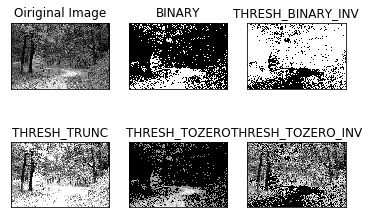

In [36]:
ret,thresh_binary = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY)

ret,thresh_binary_inv = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY_INV)

ret,thresh_trunc = cv2.threshold(gray_image,127,255,cv2.THRESH_TRUNC)

ret,thresh_tozero = cv2.threshold(gray_image,127,255,cv2.THRESH_TOZERO)

ret,thresh_tozero_inv = cv2.threshold(gray_image,127,255,cv2.THRESH_TOZERO_INV)

#DISPLAYING THE DIFFERENT THRESHOLDING STYLES
names = ['Oiriginal Image','BINARY','THRESH_BINARY_INV','THRESH_TRUNC','THRESH_TOZERO','THRESH_TOZERO_INV']
images = gray_image,thresh_binary,thresh_binary_inv,thresh_trunc,thresh_tozero,thresh_tozero_inv

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i],'gray')
    plt.title(names[i])
    plt.xticks([])
    plt.yticks([])
    
plt.show()

# Bitwise Operations

Bitwise Operations include AND, OR, NOT and XOR. In computer vision, these operations are very useful when we have a mask image and want to apply that mask over another image to extract the region of interest.

#### Image in BGR  format

In [82]:
image1 = cv2.imread('wallpaper1.jpg')

#### Image in RGB format

In [83]:
image2 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

#### Bitwise and with no mask

In [84]:
image = cv2.bitwise_and(image1, image2, mask = None)

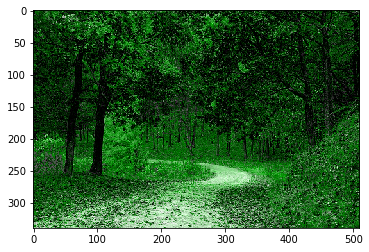

In [85]:
plt.imshow(image)
plt.show()

#### Bitwise or with no mask

In [86]:
image = cv2.bitwise_or(image1, image2, mask = None)

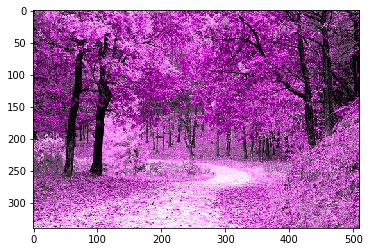

In [87]:
plt.imshow(image)
plt.show()

#### Bitwise not with no mask

In [88]:
image = cv2.bitwise_not(image1, image2, mask = None)

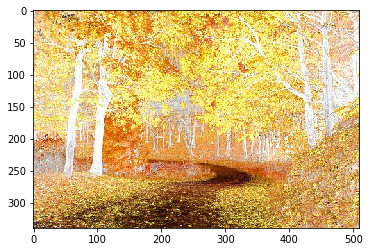

In [89]:
plt.imshow(image)
plt.show()

# Edge Detection 

Edges are the points in an image where the image brightness changes sharply or has discontinuities. Such discontinuities generally correspond to:

Discontinuities in depth
Discontinuities in surface orientation
Changes in material properties
Variations in scene illumination
Edges are very useful features of an image that can be used for different applications like classification of objects in the image and localization. Even deep learning models calculate edge features to extract information about the objects present in image.

Edges are different from contours as they are not related to objects rather they signify the changes in pixel values of an image. Edge detection can be used for image segmentation and even for image sharpening.

In [90]:
image = cv2.imread('wallpaper1.jpg', 0)

In [101]:
#calculate the edges using Canny edge algorithm
edges = cv2.Canny(image,400,400) 

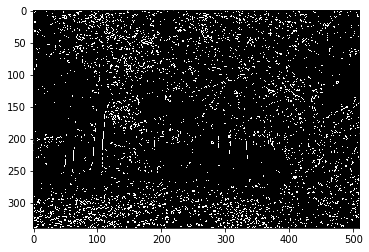

In [102]:
plt.imshow(edges, cmap = 'gray')
plt.show()